In [74]:
import numpy as np
import sklearn
import keras
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
# Indicate path to dataset
DATA_PATH = 'mnistData.npz'
#DATA_PATH = 'fashion_mnist_Data.npz'

# Load files
npzfile = np.load(DATA_PATH)
npzfile.files

['X_train', 'y_train', 'X_test', 'y_test']

In [76]:
X_train, y_train = npzfile['X_train'], npzfile['y_train']
X_test, y_test = npzfile['X_test'], npzfile['y_test']

print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


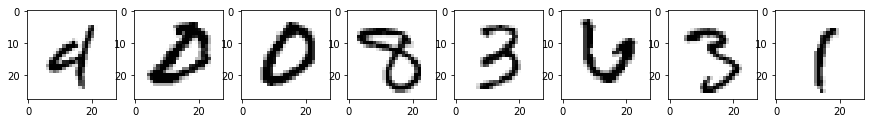

In [77]:
N_2_SHOW = 8

# Take a random set of indeces
rng = np.random.RandomState(seed=42)
imgIndeces = rng.randint(0, len(X_train), size=N_2_SHOW)

# Show images
plt.figure(figsize=(15,3))
for i, imgIdx in enumerate(imgIndeces):
    # get current image
    curImg = X_train[imgIdx]
    
    # show image
    plt.subplot(1,N_2_SHOW,(i+1))
    plt.imshow(curImg, cmap='gray_r')

plt.show()

del N_2_SHOW, rng

In [78]:
def noisify(img, scale=0.38):
    noise = np.abs(np.random.normal(scale=scale, size=img.shape))
    noisy_img = noise + img
    noisy_img = noisy_img/(np.max(noisy_img))
    return noisy_img

In [83]:
def noisify_n(imgs, scale=0.38):
    noisy_imgs = np.zeros(imgs.shape)
    for i in range(noisy_imgs.shape[0]):
        noisy_imgs[i] = noisify(imgs[i], scale=scale)
    return noisy_imgs

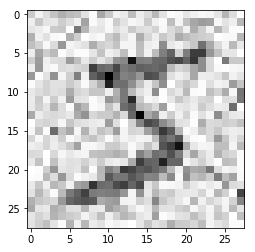

In [98]:
plt.imshow(noisify(X_train[0]), cmap="gray_r")
plt.show()
#noisify(X_train[0])

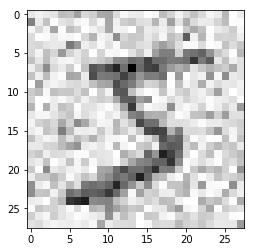

In [100]:
plt.imshow(noisify_n(X_train)[0], cmap="gray_r")
plt.show()

In [101]:
noisy_X_train = noisify_n(X_train)
noisy_X_test = noisify_n(X_test)
noisy_data = {"X_train": noisy_X_train, "y_train": y_train, "X_test": noisy_X_test, "y_test": y_test}

In [108]:
SAVE_PATH = "mnist_noisy_Data_0_38.npz"

np.savez(SAVE_PATH, X_train=noisy_X_train, y_train=y_train, X_test=noisy_X_test, y_test=y_test)